In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py


In [2]:
df= pd.read_csv('/content/drive/My Drive/Projects/HR Employee Attrition and Performance/WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(df.head())

   Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0   41       Yes  ...                       0                     5
1   49        No  ...                       1                     7
2   37       Yes  ...                       0                     0
3   33        No  ...                       3                     0
4   27        No  ...                       2                     2

[5 rows x 35 columns]


**Checking the quality of the data by looking into the null values if there are any!!!!**

In [3]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

As we can see that there are no null values. Now the next thing is to explore the data to get more gist of it. It is one of the most importmant part of the building any model because sometimes by looking are the data you can tell which model can work better.

### **Exploratory Data Analysis**

In [0]:
##I found KDE plots really interesting. So, I will working on that in this notebook

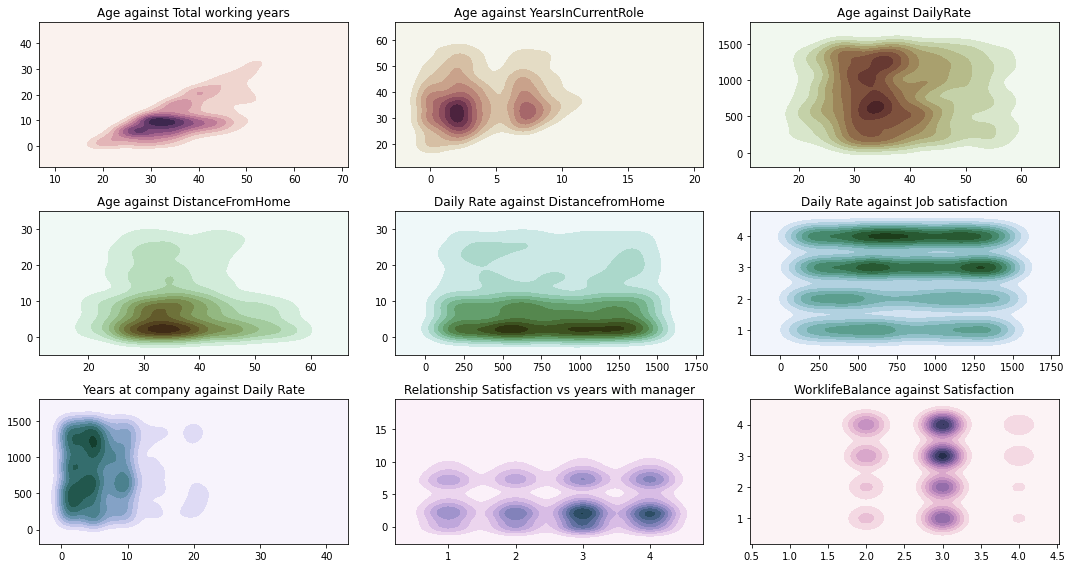

In [5]:
##Plotting KDE
f, axes= plt.subplots(3,3,figsize=(15,8),sharex=False,sharey=False)

##Defining color map scheme
s= np.linspace(0,3,10)
cmap= sns.cubehelix_palette(start=0.0,light=1,as_cmap=True)

###defining the map
X= df.Age.values
Y= df.TotalWorkingYears.values
sns.kdeplot(X,Y ,cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age against Total working years')

cmap= sns.cubehelix_palette(start=0.33333,light=1,as_cmap=True)
###defining the map
Y= df.Age.values
X= df.YearsInCurrentRole.values
sns.kdeplot(X,Y ,cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Age against YearsInCurrentRole')

cmap= sns.cubehelix_palette(start=0.666667,light=1,as_cmap=True)
###defining the map
X= df.Age.values
Y= df.DailyRate.values
sns.kdeplot(X,Y ,cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = 'Age against DailyRate')

cmap= sns.cubehelix_palette(start=1,light=1,as_cmap=True)
###defining the map
X= df.Age.values
Y= df.DistanceFromHome.values
sns.kdeplot(X,Y ,cmap=cmap, shade=True, ax=axes[1,0])
axes[1,0].set( title = 'Age against DistanceFromHome')


cmap = sns.cubehelix_palette(start=1.333333, light=1, as_cmap=True)
# Generate and plot
x = df['DailyRate'].values
y = df['DistanceFromHome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'Daily Rate against DistancefromHome')

cmap = sns.cubehelix_palette(start=1.66666666666667, light=1, as_cmap=True)
# Generate and plot
x = df['DailyRate'].values
y = df['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set( title = 'Daily Rate against Job satisfaction')


cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = df['YearsAtCompany'].values
y = df['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set( title = 'Years at company against Daily Rate')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = df['RelationshipSatisfaction'].values
y = df['YearsWithCurrManager'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set( title = 'Relationship Satisfaction vs years with manager')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = df['WorkLifeBalance'].values
y = df['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set( title = 'WorklifeBalance against Satisfaction')


f.tight_layout()


In [0]:
##defining the dictoniary for the target mapping
target_map= {'Yes':1,'No':0}
# Use the pandas apply method to numerically encode our attrition target variable

df['Attrition']= df['Attrition'].apply(lambda x: target_map[x])

In [7]:
df['Attrition'].head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

**Now it's time to check for the correlation features. We will be using pandas to find out the independents variables correlations to one an other. Obviously we do not need the features which are highly correlated to each other as they shows the same stats. In model, we will try to work on with uncorrelated features**

In [0]:
##We will be using pearson correlation matrix with heat map

In [9]:
# creating a list of only numerical values
numerical = [u'Age', u'DailyRate', u'DistanceFromHome', 
             u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
             u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
             u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
             u'StockOptionLevel', u'TotalWorkingYears',
             u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
             u'YearsInCurrentRole', u'YearsSinceLastPromotion',u'YearsWithCurrManager']

##generating the pearson correlation
data= [go.Heatmap(z= df[numerical].astype(float).corr().values,
      x=df[numerical].columns.values,
      y=df[numerical].columns.values,
      colorscale='Viridis',opacity=1.0)]

layout= go.Layout(title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700
    )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

**From the correlation plots, we can see that quite a lot of our columns seem to be poorly correlated with one another. Generally when making a predictive model, it would be preferable to train a model with features that are not too correlated with one another so that we do not need to deal with redundant features. In the case that we have quite a lot of correlated features one could perhaps apply a technique such as Principal Component Analysis (PCA) to reduce the feature space.**

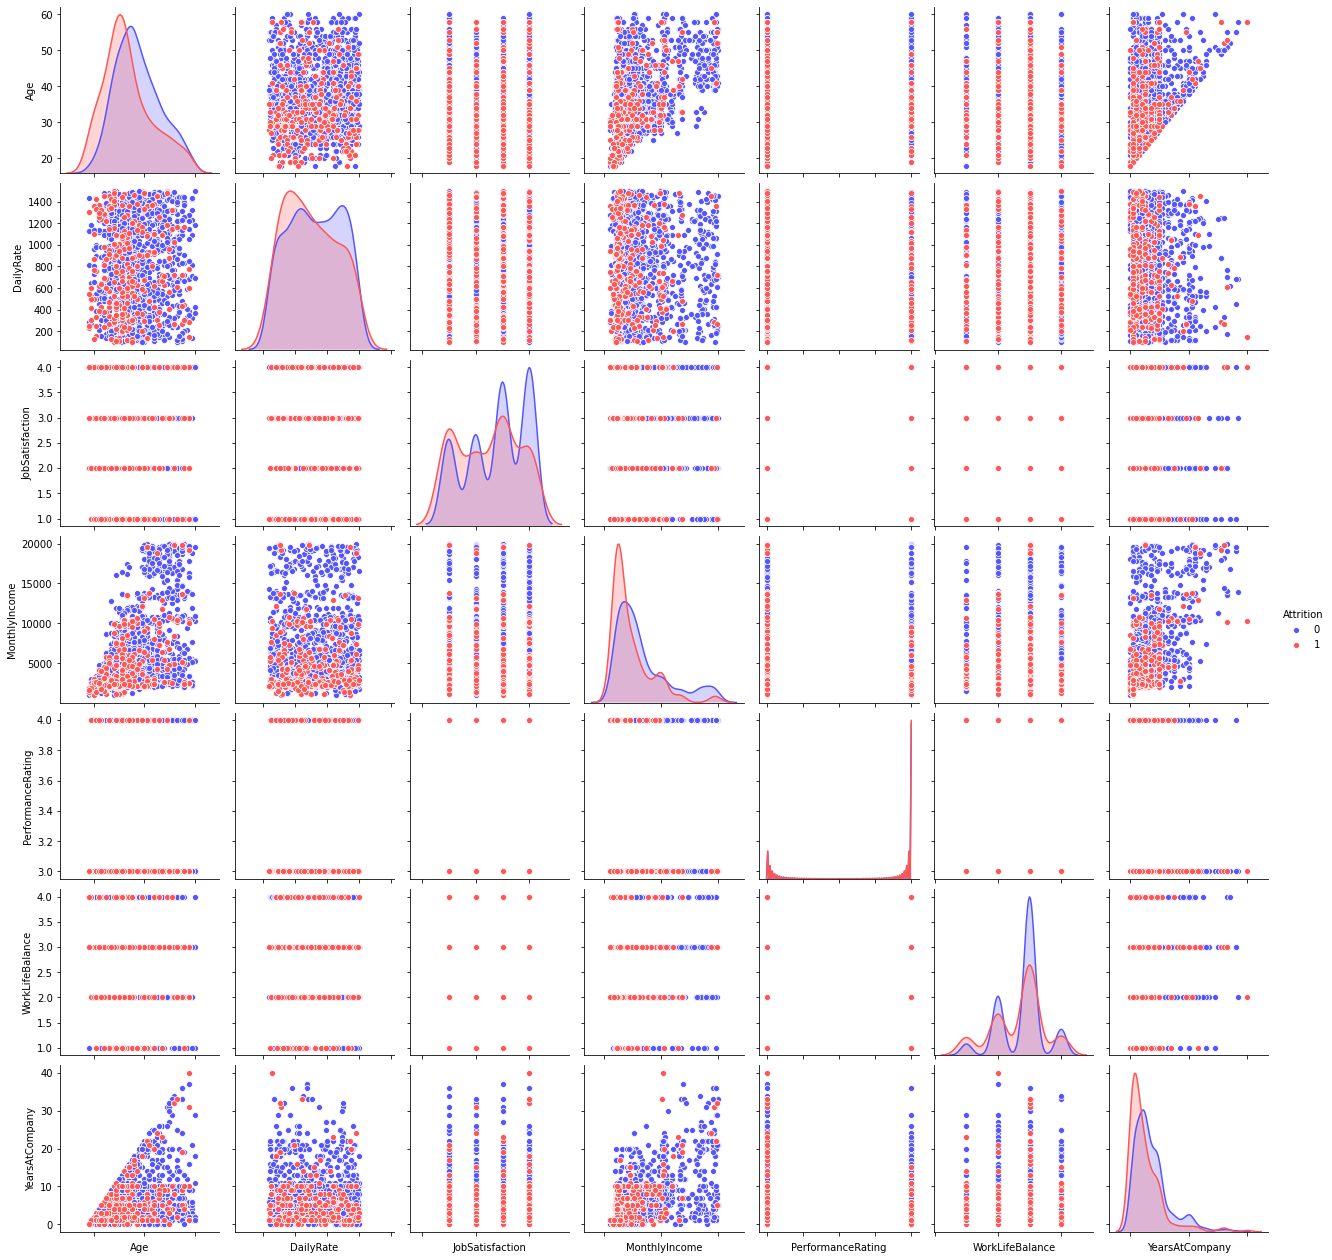

In [10]:
numerical = [u'Age', u'DailyRate',  u'JobSatisfaction',
       u'MonthlyIncome', u'PerformanceRating',
        u'WorkLifeBalance', u'YearsAtCompany', u'Attrition']

g = sns.pairplot(df[numerical], hue='Attrition', palette='seismic', diag_kind = 'kde',diag_kws=dict(shade=True))
g.set(xticklabels=[])

### **Feature Engineering & Categorical Variables**


In [11]:
####checking the categorical columns in the dataset
column= []
for col in df.select_dtypes(include=['object']):
  column.append(col)


df[column].head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [12]:
###cehcking the unique values of these columns
u_BusinessTravel= df[column[0]].value_counts()
print('Unique values in',column[0],':-',u_BusinessTravel)

print()

u_Department= df[column[1]].value_counts()
print('Unique values in',column[1],':-',u_Department)

print()

u_EducationField= df[column[2]].value_counts()
print('Unique values in',column[2],':-',u_EducationField)

print()

u_gender= df[column[3]].value_counts()
print('Unique values in',column[3],':-',u_gender)

print()

u_jobrole= df[column[4]].value_counts()
print('Unique values in',column[4],':-',u_jobrole)

print()

u_maritalstatus= df[column[5]].value_counts()
print('Unique values in',column[5],':-',u_maritalstatus)

print()

u_over18= df[column[6]].value_counts()
print('Unique values in',column[6],':-',u_over18)

print()

u_overtime= df[column[7]].value_counts()
print('Unique values in',column[7],':-',u_overtime)


Unique values in BusinessTravel :- Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Unique values in Department :- Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Unique values in EducationField :- Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Unique values in Gender :- Male      882
Female    588
Name: Gender, dtype: int64

Unique values in JobRole :- Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Unique values in MaritalStatus :- Married     

In [13]:
###Defining the target variable
Y= df['Attrition']

###dropping the target variable from the dataset
df= df.drop(['Attrition'],axis=1)

##Applying the get_dummies method, we see that we have encoded our categorical values conveniently by just applying one line of Python code.
dummy_cat= pd.get_dummies(df[column])
dummy_cat.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0


In [0]:

# Store the numerical features to a dataframe dum_num

numerical = [u'Age', u'DailyRate', u'DistanceFromHome', 
             u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
             u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
             u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
             u'StockOptionLevel', u'TotalWorkingYears',
             u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
             u'YearsInCurrentRole', u'YearsSinceLastPromotion',u'YearsWithCurrManager']
dum_num= df[numerical]

# Concat the two dataframes together columnwise
df_final = pd.concat([dum_num, dummy_cat], axis=1)

In [15]:
###checking the unique values in the target
Y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [16]:
####checking graphically for the target column
data = [go.Bar(
            x=Y.value_counts().index.values,
            y= Y.value_counts().values
    )]

py.iplot(data, filename='basic-bar')

**We can clearly see that out dataset is unbalanced. First we will try to predict and see the results before dealing with unbalanced data**

### **Implementing Machine learning Model**

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(df_final,Y,test_size=0.2,random_state=123)

### **SMOTE to oversample due to unbalanced dataset**

In [22]:
from imblearn.over_sampling import SMOTE

oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



### **Random Forest Classifier** 

In [0]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

rf_params= {
    'n_jobs' : -1,
    'n_estimators' : 1000,
    'max_features' : 0.3,
    'max_depth' : 4,
    'min_samples_leaf':2,
    'max_features': 'sqrt',
    'random_state' : 0,
    'verbose': 0
}

rf = RandomForestClassifier(**rf_params)



In [27]:
rf.fit(smote_train, smote_target)
print("Fitting of Random Forest finished")

Fitting of Random Forest finished


In [29]:
rf_predictions = rf.predict(X_test)
print("Predictions finished")

Predictions finished


In [34]:
from sklearn.metrics import (accuracy_score, log_loss, classification_report, confusion_matrix)

print("Accuracy score: {}".format(accuracy_score(y_test, rf_predictions)))
print("="*80)
print(classification_report(y_test, rf_predictions))

Accuracy score: 0.8809523809523809
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       256
           1       0.53      0.63      0.58        38

    accuracy                           0.88       294
   macro avg       0.74      0.77      0.75       294
weighted avg       0.89      0.88      0.89       294



In [37]:
print('Confusion Matrix:- ')
print(confusion_matrix(y_test, rf_predictions))

Confusion Matrix:- 
[[235  21]
 [ 14  24]]


### **AUC ROC Curve** 

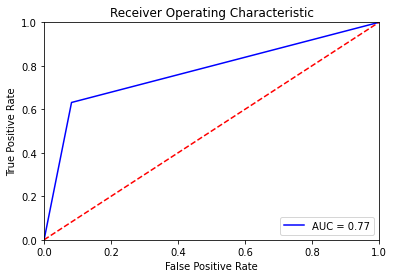

In [39]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, rf_predictions)
roc_auc = metrics.auc(fpr, tpr)



import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### **Feature Improtance**

In [42]:
# Scatter plot 
trace = go.Scatter(
    y = rf.feature_importances_,
    x = df_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = df_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')


### **Gradient Boosted Tree**

In [46]:
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : 0,
    'verbose': 0
}
gb = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
gb.fit(smote_train, smote_target)
# Get our predictions


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.25, loss='deviance', max_depth=4,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
gb_predictions = gb.predict(X_test)

In [48]:
print(accuracy_score(y_test, gb_predictions))
print(classification_report(y_test, gb_predictions))

0.8979591836734694
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       256
           1       0.65      0.45      0.53        38

    accuracy                           0.90       294
   macro avg       0.79      0.71      0.74       294
weighted avg       0.89      0.90      0.89       294



In [50]:
print('Confusion Matrix:- ')
print(confusion_matrix(y_test, gb_predictions))

Confusion Matrix:- 
[[247   9]
 [ 21  17]]


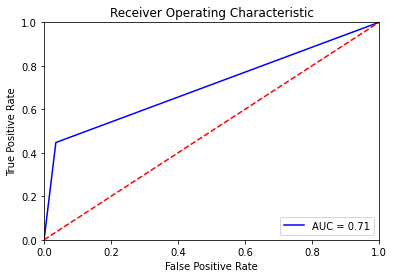

In [52]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, gb_predictions)
roc_auc = metrics.auc(fpr, tpr)



import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [53]:
trace = go.Scatter(
    y = gb.feature_importances_,
    x = df_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = df_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')


### ***Although we got good accuracy, there are still room for more improvement by using gridsearch and we can use other boosted tree like ada boost, xgboost which works equvivalent good.***